In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

# PRACTICEs

## 1.1. Model `1:N` relationships with `foreign keys`
First, look at the following `current database model`

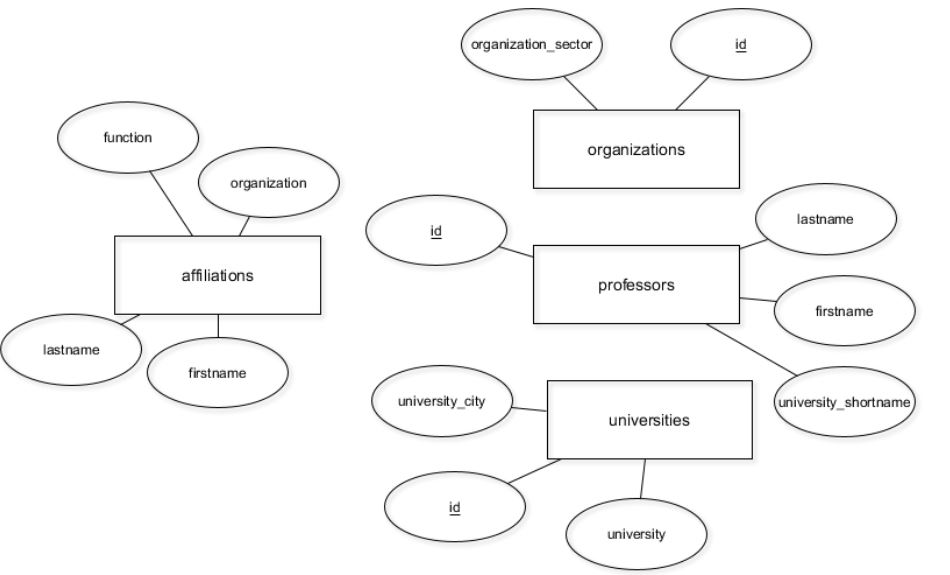

In [2]:
## hidden

Next, many `professors` can work for one `university`, so we have the following `database model`

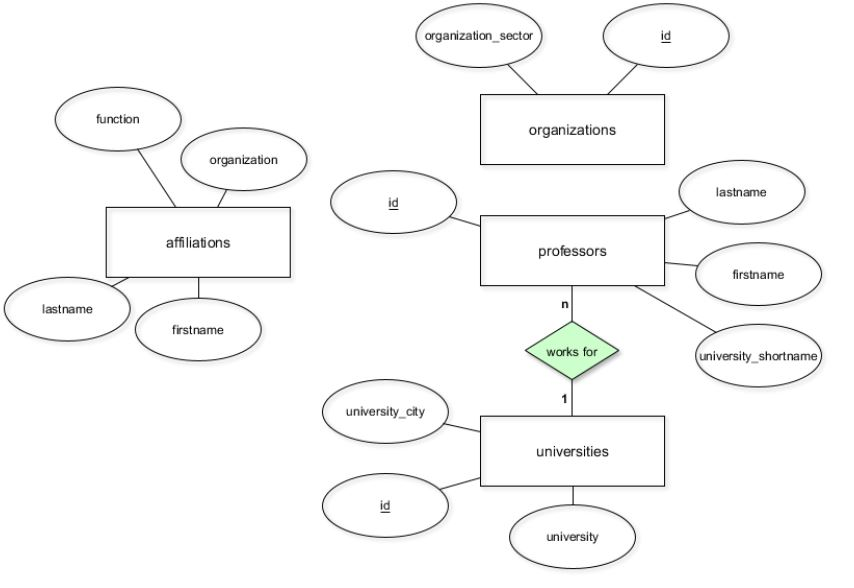

In [3]:
## In the next database, the `professors` works for the `universities`

#### Some notes when implement relationship with foreign key
> A **`foreign key (FK)`** points to the `primary key (PK)` of another table
>
> Domain of `FK` must be equal to domain of `PK`
>
> Each value of `FK` much exist in `PK` of the other table (`FK constraint` or `referential integrity`)
>
> `FKs` are not actual `keys`.

Now, look at these databases! The column of `university_shortname` in `professors` is the same domain of column with the `id` in the `universities` table!

            SELECT * FROM professors LIMIT 4
| id |firstname|lastname|university_shortname |
|----|---------|--------|---------------------|
| 1  |Karl|Aberer|EPF
| 2  |Reza Shokrollah|Abhari|ETH
| 3  |Georges|Abou Jaoudé|EPF
| 4  |Hugues|Abriel|UBE

and

            SELECT * FROM universities LIMIT 5
| id  |university|university_city |
|-----|----------|----------------|
| EPF|ETH Lausanne|Lausanne
| ETH|ETH Zürich|Zurich
| UBA|Uni Basel|Basel
| UBE|Uni Bern|Bern
| UFR|Uni Freiburg|Fribourg


The `FK` in the table `professors` references to the `universities` or `full fill`.

#### Specifying a `FKs`

**Example 1.1**

                CREATE TABLE manufactures(
                                          name varchar(255) PRIMARY KEY
                                          );
                INSERT INTO manufactures
                VALUES ('Ford'), ('VM'), ('GM');
                
                CREATE TABLE cars (
                                    model varchar(255) PRIMARY KEY,
                                    manufacture_name integer REFERENCES manufactures(name)
                                    );
                INSERT INTO cars
                VALUES ('Ranger', 'Ford'), ('Beetle', 'VW');
Then this will throw an error_message:

            foreign key constraint "cars_manufacture_name_fkey" cannot be implemented
            DETAIL:  Key columns "manufacture_name" and "name" are of incompatible types: integer and character varying.
So, we must change `integer` into `varchar(255)` in the `manufacture_name`!!! Let's see the next example!

#### Example 1.2.

                        CREATE TABLE manufactures(
                                          name varchar(255) PRIMARY KEY
                                    );
                        INSERT INTO manufactures
                        VALUES ('Ford'), ('VW'), ('GM');

                        CREATE TABLE cars (
                                    model varchar(255) PRIMARY KEY,
                                    manufacture_name char(255) REFERENCES manufactures(name)
                                    );
                        INSERT INTO cars
                        VALUES ('Ranger', 'Ford'), ('Beetle', 'VW');

                        SELECT * FROM cars

**query result**

| model	  | manufacture_name  |
|---------|-------------------|
| Ranger  |	  Ford                                                                                                                                   
| Beetle  | 	VW                                                                                                             
 

#### Example 1.3. Incorrect specifying !!!

                CREATE TABLE manufactures(
                                  name varchar(255) PRIMARY KEY
                            );
                INSERT INTO manufactures
                VALUES ('Ford'), ('VW'), ('GM');

                CREATE TABLE cars (
                            model varchar(255) PRIMARY KEY,
                            manufacture_name char(255) REFERENCES manufactures(name)
                            );

                INSERT INTO cars
                VALUES ('Tundra', 'Toyota');
Then, the **`error_message`** will warn that:

                insert or update on table "cars" violates foreign key constraint "cars_manufacture_name_fkey"
                DETAIL:  Key (manufacture_name)=(Toyota) is not present in table "manufactures" (just be 'Ford', 'VW' and 'GM').

### How to specifying the foreign key in the existing table??
**Syntax:**

                        ALTER TABLE a 
                        ADD CONSTRAINT a_fkey FOREIGN KEY (b_id) REFERENCES b (id);
**Example 1.4**

                    CREATE TABLE teams(
                                      club_name varchar(255) PRIMARY KEY,
                                      short_name varchar(5) UNIQUE NOT NULL,
                                      est_year integer
                                );
                    INSERT INTO teams
                    VALUES ('Arsenal', 'ARS', '1886'), ('Aston Villa', 'AVFC', '1874'), 
                            ('Chelsea', 'CFC', '1905'), ('Liverpool', 'LIV', '1892');

                    CREATE TABLE cups(
                                        C1_cup integer,    -- Count from 1960s
                                        UEFA_cup integer,  -- Included European cup winner
                                        UEFA_super_cup integer,                    
                                        EPL_cup integer,   -- Included First Division & Premier League
                                        FA_cup integer,
                                        League_cup integer,
                                        team_name char(255) REFERENCES teams(club_name),
                                        club_shortname varchar(5)
                                    );
                    INSERT INTO cups
                    VALUES (0, 1, 0, 13, 16, 2, 'Arsenal', 'ARS'), (1, 0, 1, 7, 7, 5, 'Aston Villa', 'AVFC');

                    ALTER TABLE cups
                    RENAME COLUMN club_shortname TO team_id;
                    ALTER TABLE cups
                    ADD CONSTRAINT cups_key FOREIGN KEY (team_id) REFERENCES teams (short_name);

                    SELECT * FROM cups
**query result**

| c1_cup|uefa_cup|uefa_super_cup|epl_cup|fa_cup|league_cup|team_name|team_id |
|-------|--------|--------------|-------|------|----------|---------|--------|
| 0|1|0|13|16|2|Arsenal |ARS
| 1|0|1|7|7|5|Aston Villa|AVFC


### EXERCISEs

#### Exercise 1.1. REFERENCE a table with a FOREIGN KEY
In your database, you want the `professors` table to reference the universities table. You can do that by specifying a column in `professors` table that references a column in the `universities` table.

As just shown in the previous section, the `syntax` for that looks like this:

                ALTER TABLE a 
                ADD CONSTRAINT a_fkey FOREIGN KEY (b_id) REFERENCES b (id);
Table a should now refer to `table b`, via `b_id`, which points to `id`. `a_fkey` is, as usual, a `constraint` name you can choose on your own.

Pay attention to the naming convention employed here: Usually, a `foreign key` referencing another `primary key` with name `id` is named `x_id`, where `x` is the name of the referencing table in the singular form.

#### Instructions.
**Step 1.** Rename the `university_shortname` column to `university_id` in `professors`.

**SOLUTION.**

                ALTER TABLE professors
                RENAME COLUMN university_shortname TO university_id;
**Step 2.** Add a **`foreign key`** on `university_id` column in `professors` that references the `id` column in `universities`. Then name this **`foreign key`** be `professors_fkey`. Finally, print the first 4 rows

**SOLUTION.**

                -- Rename the university_shortname column
                ALTER TABLE professors
                RENAME COLUMN university_shortname TO university_id;

                -- Add a foreign key on professors referencing universities
                ALTER TABLE professors
                ADD CONSTRAINT professors_fkey FOREIGN KEY (university_id) REFERENCES universities (id);
                
                -- Print out
                SELECT * FROM professors
                LIMIT 4;
**query result.**

|id|firstname|lastname|university_id |
|--|---------|--------|--------------|
|1|Karl|Aberer|EPF
|2|Reza Shokrollah|Abhari|ETH
|3|Georges|Abou Jaoudé|EPF
|4|Hugues|Abriel|UBE

#### Exercise 1.2. Explore foreign key constraints
`Foreign key constraints` help you to keep order in your database `mini-world`. In your database, for instance, only `professors` belonging to `Swiss universities` should be allowed, as only `Swiss universities` are part of the `universities` table.

The foreign key on `professors` referencing `universities` you just created thus makes sure that only existing `universities` can be specified when inserting new data. Let's test this!

#### Instructions
**Step 1.** Run the sample code and have a look at the error message.

            -- Try to insert a new professor
            INSERT INTO professors (firstname, lastname, university_id)
            VALUES ('Albert', 'Einstein', 'MIT');
**Error message**

                insert or update on table "professors" violates foreign key constraint "professors_fkey"
                DETAIL:  Key (university_id)=(MIT) is not present in table "universities".
**Step 2.** What's wrong? Correct the `university_id` so that it actually reflects where `Albert Einstein` wrote his dissertation and became a professor – at the University of `Zurich (UZH)`!

**SOLUTION.** We must change the value `MIT` into `UZH`,

                -- Try to insert a new professor
                INSERT INTO professors (firstname, lastname, university_id)
                VALUES ('Albert', 'Einstein', 'UZH');

As you can see, inserting a `professor` with `non-existing university IDs` violates the `foreign key constraint` you've just added. This also makes sure that all universities are spelled equally – **adding to data consistency**.

#### Exercise 1.3. JOIN tables linked by a foreign key
Let's join these two tables to analyze the data further!

You might already know how `SQL` joins work from the [Intro to SQL for Data Science course (last exercise)](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/SQL%20practices/Introduction%20to%20using%20SQL%20%26%20ML%20prob%20on%20jupyter%20notebook) or from [Joining Data in PostgreSQL](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/SQL%20practices/Joining%20data%20in%20SQL).

Here's a quick recap on how joins generally work:

                    SELECT ...
                    FROM table_a
                    JOIN table_b
                    ON ...
                    WHERE ...
While foreign keys and primary keys are not strictly necessary for join queries, they greatly help by telling you what to expect. For instance, you can be sure that records referenced from table A will always be present in table B – so a join from table A will always find something in table B. If not, the foreign key constraint would be violated.

#### Instructions
**`JOIN`** `professors` with `universities` on `professors.university_id = universities.id`, i.e., retain all records where the foreign key of professors is equal to the primary key of universities.

Filter for `university_city = 'Zurich'`

**SOLUTION.**

                        -- Select all professors working for universities in the city of Zurich
                        SELECT professors.lastname, universities.id, universities.university_city
                        FROM professors
                        JOIN universities
                        ON professors.university_id = universities.id
                        WHERE universities.university_city = 'Zurich'
                        LIMIT 5;
**query result.**

| lastname|id|university_city|
|---------|--|---------------|
| Abhari|ETH|Zurich
| Axhausen|ETH|Zurich
| Baschera|ETH|Zurich
| Basin|ETH|Zurich
| Bechtold|ETH|Zurich

That's a long query! First, the `university` belonging to each `professor` was attached with the **`JOIN`** operation. Then, only professors having `"Zurich"` as university city were retained with the **`WHERE`** clause.

## 2. Model more complex relationships
First, look back the `current database model` in the previous section,

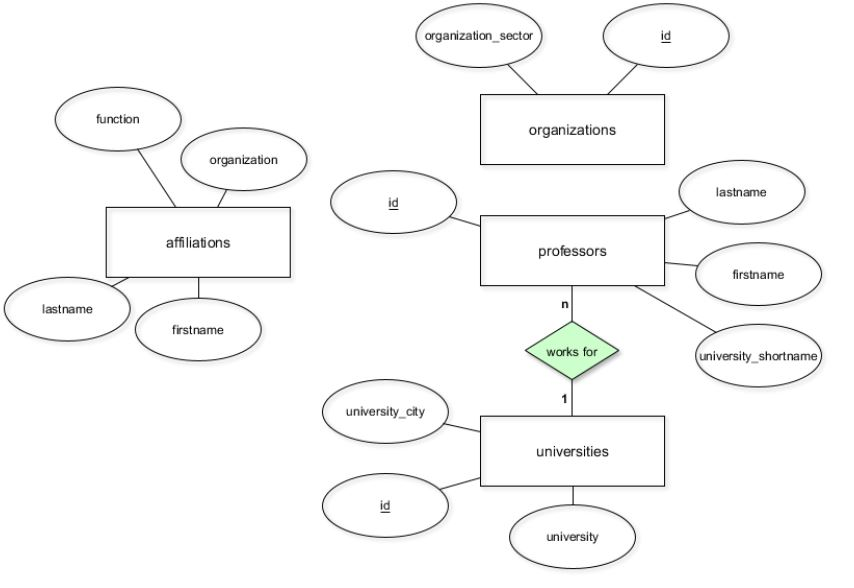

In [4]:
## In the next database, the `professors` works for the `universities`

But in fact, the `organizations` and `professors` have more than 1 connections. For example

> (i) `Professor (Aberer)` can be a `Chairman of L3S Advisory Board, Member of Conseil Fondation IDIAP` and `Panel Member`. Look at the following sample code and its query result!

                    SELECT firstname, lastname, function
                    FROM affiliations
                    LIMIT 5

**query result**

| firstname|lastname|function     |
|----------|--------|-------------|
| Karl|Aberer|Member Conseil of Zeno-Karl Schindler Foundation
| Karl|Aberer|Panel Member 
| Karl|Aberer|Member of Conseil Fondation IDIAP
| Karl|Aberer|Chairman of L3S Advisory Board
| Reza Shokrollah|Abhari|Aufsichtsratsmandat


> (ii) Likewise, there are many `professors` works the same `organization_sector`; such as the `VR-Mandat` have 33 different professors! Look at the following `query result`

                    SELECT COUNT(*)
                    FROM (SELECT firstname, COUNT(*)
                            FROM affiliations
                            WHERE function = 'VR-Mandat'
                            GROUP BY firstname
                            ) AS summary
**query result**        

| count |
|-------
| 33 |

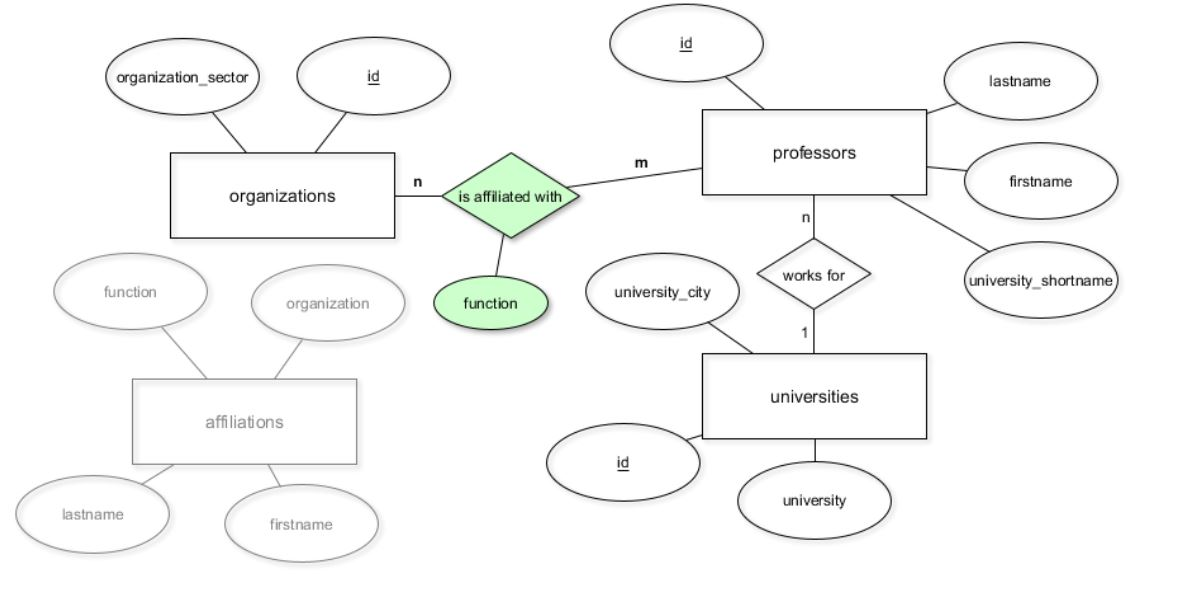

In [5]:
## how to implement the many to many relationship : `N : M`

### How to implement the `N-M` relationship !?

- 1) Create a table
- 2) Add foreign key for every connected table
- 3) Add additional attributes.
- 4) No primary key

For example,

                -- Create a table
                CREATE TABLE affiliations (  
                                            -- Add the FK for every connected tables : professors and organizations
                                            professor_id integer REFERENCES professors(id),  
                                            organization_id varchar(256) REFERENCES orangizations(id),
                                            
                                            -- Add additional attributes
                                            function varchar(256)
                                            )
                                            
By the way, the possible `PK` here be `{professor_id, organization_id, function}`.

### EXERCISEs

#### Exercise 2.1. Add foreign keys to the "affiliations" table
At the moment, the affiliations table has the structure `{firstname, lastname, function, organization}`, as you can see in the preview at the bottom right. In the next three exercises, you're going to turn this table into the form `{professor_id, organization_id, function}`, with `professor_id` and `organization_id` being foreign keys that point to the respective tables.

You're going to transform the `affiliations` table in-place, i.e., without creating a temporary table to cache your intermediate results.

#### Instructions
**Step 1.** Add a `professor_id` column with integer data type to `affiliations`, and declare it to be a `foreign key` that references the id column in `professors`.

**SOLUTION.**

                -- Add a professor_id column
                ALTER TABLE affiliations
                ADD COLUMN professor_id integer REFERENCES professors (id);
**Step 2.** Rename the `organization` column in `affiliations` to `organization_id`.

**SOLUTION.**

                -- Add a professor_id column
                ALTER TABLE affiliations
                ADD COLUMN professor_id integer REFERENCES professors (id);

                -- Rename the organization column to organization_id
                ALTER TABLE affiliations
                RENAME COLUMN organization TO organization_id;
**Step 3.** Add a `foreign key constraint` on `organization_id` so that it references the id column in `organizations`.

**SOLUTION.**

                -- Add a professor_id column
                ALTER TABLE affiliations
                ADD COLUMN professor_id integer REFERENCES professors (id);

                -- Rename the organization column to organization_id
                ALTER TABLE affiliations
                RENAME organization TO organization_id;

                -- Add a foreign key on organization_id
                ALTER TABLE affiliations
                ADD CONSTRAINT affiliations_organization_fkey FOREIGN KEY (organization_id) REFERENCES organizations (id);

Perfect! Making `organization_id` a `foreign key` worked flawlessly because these organizations actually exist in the `organizations` table. That was only the first part, though. Now it's time to update `professor_id` in `affiliations` – so that it correctly refers to the corresponding `professors`.

#### Exercise 2.2. Populate the "professor_id" column
Now it's time to also populate professors_id. You'll take the `ID` directly from `professors`.

Here's a way to update columns of a table based on values in another table:

                UPDATE table_a
                SET column_to_update = table_b.column_to_update_from
                FROM table_b
                WHERE condition1 AND condition2 AND ...;
This query does the following:

For each row in `table_a`, find the corresponding row in `table_b` where `condition1, condition2, etc.`, are met.

Set the value of `column_to_update` to the value of `column_to_update_from` (from that corresponding row).

The conditions usually compare other columns of both tables, e.g. `table_a.some_column = table_b.some_column`. Of course, this `query` only makes sense if there is only one matching row in `table_b`.

#### Instructions.
**Step 1.** First, have a look at the `current state` of `affiliations` by `fetching` 10 rows and all columns.

**SOLUTION.**

                    SELECT * FROM affiliations
                    LIMIT 10;
**query result.**

| firstname|lastname|function|organization_id|professor_id    |
|----------|--------|--------|---------------|----------------|
| Karl|Aberer|Chairman of L3S Advisory Board|L3S Advisory Board|null
| Karl|Aberer|Member Conseil of Zeno-Karl Schindler Foundation|Zeno-Karl Schindler Foundation|null
| Karl|Aberer|Member of Conseil Fondation IDIAP|Fondation IDIAP|null
| Karl|Aberer|Panel Member |SNF Ambizione Program|null
| Reza Shokrollah|Abhari|Aufsichtsratsmandat|PNE Wind AG|null
| Georges|Abou Jaoudé|Professeur invité (2 interventions d'une semaine)|Kazan Federal University, Russia|null
| Hugues|Abriel|NA|Cloetta Stiftung|null
| Daniel|Aebersold|NA|Berner Radium-Stiftung|null
| Daniel|Aebersold|NA|Janser Krebs-Stiftung|null
| Daniel|Aebersold|NA|SWAN Isotopen AG|null

**Step 2.** Update the `professor_id` column with the corresponding value of the `id` column in `professors`. "Corresponding" means rows in `professors` where the `firstname` and `lastname` are identical to the ones in `affiliations`.

**SOLUTION.**

            -- Set professor_id to professors.id where firstname, lastname correspond to rows in professors
            UPDATE affiliations
            SET professor_id = professors.id
            FROM professors
            WHERE affiliations.firstname = professors.firstname AND affiliations.lastname = professors.lastname;
**Step 3.** Check out the first 10 rows and all columns of `affiliations` again. Have the `professor_ids` been correctly matched?

**SOLUTION.**

            UPDATE affiliations
            SET professor_id = professors.id
            FROM professors
            WHERE affiliations.firstname = professors.firstname AND affiliations.lastname = professors.lastname;

            -- Have a look at the 10 first rows of affiliations again
            SELECT * FROM affiliations LIMIT 10;
**query result**

| firstname|lastname|function|organization_id| professor_id   |
|----------|--------|--------|---------------|----------------|
| Peter|Schneemann|NA|CIHA|442
| Heinz|Zimmermann|Mitglied des Stiftungsrates|Stiftung zur Förderung des Schweizerischen Wirtschaftsarchivs am WWZ der Universität Basel|539
| Heinz|Zimmermann|Mitglied des Verwaltungsrates|Remaco AG, Basel|539
| Heinz|Zimmermann|Mitglied des Verwaltungsrates|Versicherung der Schweizer Ärzte, Bern|539
| Heinz|Zimmermann|Mitglied des Verwaltungsrates|vescore Solutions, St. Gallen|539
| Heinz|Zimmermann|Verwaltungsrat inkl. Präsidium Vorsorgestiftung|Viollier AG, Allschwil|539
| Klaus|Zuberbühler|Co-directeur|Tai Monkey Project (Côte d'Ivoire)|541
| Klaus|Zuberbühler|Directeur scientifique|Budongo Conservation Field Station (Ouganda)|541
| Klaus|Zuberbühler|Enseignement|Université St Andrews (UK) |541
| Klaus|Zuberbühler|Membre du conseil scientifique|Max Planck Institute of Evolutionary Anthropology|541

Wow, that was a thing! As you can see, the correct `professors.id` has been inserted into `professor_id` for each record, thanks to the matching `firstname` and `lastname` in both tables.

#### Exercise 2.3. Drop "firstname" and "lastname"
The `firstname` and `lastname` columns of `affiliations` were used to establish a link to the professors table in the last exercise – so the appropriate `professor IDs` could be copied over. This only worked because there is exactly one corresponding `professor` for each row in `affiliations`. In other words: `{firstname, lastname}` is a candidate key of `professors` – a unique combination of columns.

It isn't one in `affiliations` though, because, as said in the video, professors can have more than one affiliation.

Because `professors` are referenced by `professor_id` now, the `firstname` and `lastname` columns are ***no longer needed***, so it's time to drop them. After all, one of the goals of a database is to reduce redundancy where possible.

#### Instructions
Drop the `firstname` and `lastname` columns from the `affiliations` table.

**SOLUTION.**

                    -- Drop the firstname column
                    ALTER TABLE affiliations
                    DROP COLUMN firstname;

                    -- Drop the lastname column
                    ALTER TABLE affiliations
                    DROP COLUMN lastname;

 Now the `affiliations` table that models the `N:M-relationship` between `professors` and `organizations` is finally complete.
 
## 3. Referential integrity
 
### Referential integrity
> A record referencing another table must refer to the existing record in that table 
>
> Specified between 2 tables
>
> Enforced through foreign keys
 
 
### Referential integrity violations
 The `referential integrity` in `table_A` and `table_B` is violated:
> If a record in table_B that is referenced from a record in table_A `is deleted`.
>
> If a record in table_A referencing a `non-existing` from table_B `is inserted`
>
> The `FKs` prevent the violations

### How to deal with violations

                        CREATE TABLE table_A (
                            id integer PRIMARY KEY,
                            column_a varchar(64),
                            ...
                            b_id integer REFERENCES table_B(id) ON DELETE NO ACTION
                        )
We can replace `NO ACTION` by these following `keywords` when using with `ON DELETE`:

                    |================|===================================================|
                    | ON DELETE .... |   Meanings                                        |
                    |================|===================================================|
                    | ... NO ACTION  |  Throw an error                                   |
                    |----------------|---------------------------------------------------|
                    | ... RESTRICT   |  Throw an error                                   |
                    |----------------|---------------------------------------------------|
                    | ... CASCADE    |  Delete all referencing records                   |
                    |----------------|---------------------------------------------------|
                    | ... SET NULL   |  Set the referencing columns to NULL              |
                    |----------------|---------------------------------------------------|
                    | ... SET DEFAULT|  Set the referencing columns to íts default value |
                    |----------------|---------------------------------------------------|
For example:

                        CREATE TABLE table_A (
                            id integer PRIMARY KEY,
                            column_a varchar(64),
                            ...
                            b_id integer REFERENCES table_B(id) ON DELETE CASCADE
                        )



### EXERCISEs

#### Exercise 3.1. Referential integrity violations
Given the current state of your database, what happens if you execute the following SQL statement?

                DELETE FROM universities WHERE id = 'EPF';

A. It throws an error because the university with ID "EPF" does not exist.

B. The university with ID "EPF" is deleted.

C. It fails because referential integrity from universities to professors is violated.

D. It fails because referential integrity from professors to universities is violated.

                        =================================================================
                        ANSWERS & COMMENTs
                        =================================================================
*A. Wrong submission*. The `university` with `ID "EPF"` does actually exist. The error is thrown because of another reason.

*B. Incorrect option!* Because the table `universities` contains the `EPF` in the column `id`

*C. Wrong answer*. The reason for the failure is a `foreign key constraint violation`. However, there isn't a `foreign key` column in `universities` that references a column in `professors`.

**D. Correct!!** There be a `foreign key` on `professors.university_id` that references `universities.id`, so `referential integrity` is said to hold from `professors` to `universities`.

#### Exercise 3.2. Change the referential integrity behavior of a key
So far, you implemented three foreign key constraints:

- professors.university_id to universities.id
- affiliations.organization_id to organizations.id
- affiliations.professor_id to professors.id

These foreign keys currently have the behavior **`ON DELETE NO ACTION`**. Here, you're going to change that behavior for the column referencing organizations from affiliations. If an organization is deleted, all its affiliations (by any professor) should also be deleted.

Altering a key constraint doesn't work with **`ALTER COLUMN`**. Instead, you have to delete the key constraint and then add a new one with a different **`ON DELETE`** behavior.

For deleting `constraints`, though, you need to know their name. This information is also stored in `information_schema`.

#### Instructions
**Step 1.** Have a look at the existing `foreign key constraints` by querying `table_constraints` in `information_schema`.

**SOLUTION.**

                    SELECT constraint_name, table_name, constraint_type
                    FROM information_schema.table_constraints
                    WHERE constraint_type = 'FOREIGN KEY';
**query result**

constraint_name|table_name|constraint_type    
---------------|----------|-------------------
affiliations_organization_id_fkey|affiliations|FOREIGN KEY
affiliations_professor_id_fkey|affiliations|FOREIGN KEY
professors_fkey|professors|FOREIGN KEY

**Step 2.** Delete the `affiliations_organization_id_fkey` foreign key constraint in `affiliations`.

**SOLUTION.**

                SELECT constraint_name, table_name, constraint_type
                FROM information_schema.table_constraints
                WHERE constraint_type = 'FOREIGN KEY';

                -- Drop the right foreign key constraint
                ALTER TABLE affiliations
                DROP CONSTRAINT affiliations_organization_id_fkey;
**Step 3.** Add a new `foreign key` to `affiliations` that `cascades deletion` if a referenced record is deleted from `organizations`. Name it `affiliations_organization_id_fkey`.

**SOLUTION.**

                SELECT constraint_name, table_name, constraint_type
                FROM information_schema.table_constraints
                WHERE constraint_type = 'FOREIGN KEY';

                -- Drop the right foreign key constraint
                ALTER TABLE affiliations
                DROP CONSTRAINT affiliations_organization_id_fkey;

                -- Add a new foreign key constraint from affiliations to organizations which cascades deletion
                ALTER TABLE affiliations
                ADD CONSTRAINT affiliations_organization_id_fkey FOREIGN KEY (organization_id) 
                                                                    REFERENCES organizations (id) 
                                                                      ON DELETE CASCADE;

**Step 4.** Run the **`DELETE`** and **`SELECT`** queries to double check that the deletion cascade actually works.

**SOLUTION.**

            -- Identify the correct constraint name
            SELECT constraint_name, table_name, constraint_type
            FROM information_schema.table_constraints
            WHERE constraint_type = 'FOREIGN KEY';

            -- Drop the right foreign key constraint
            ALTER TABLE affiliations
            DROP CONSTRAINT affiliations_organization_id_fkey;

            -- Add a new foreign key constraint from affiliations to organizations which cascades deletion
            ALTER TABLE affiliations
            ADD CONSTRAINT affiliations_organization_id_fkey FOREIGN KEY (organization_id) 
                                                                 REFERENCES organizations (id) 
                                                                     ON DELETE CASCADE;

            -- Delete an organization 
            DELETE FROM organizations 
            WHERE id = 'CUREM';

            -- Check that no more affiliations with this organization exist
            SELECT * FROM affiliations
            WHERE organization_id = 'CUREM';

**query result.**

| function | organization_id | professor_id |
|----------|-----------------|--------------|

As you can see, whenever an organization referenced by an affiliation is deleted, the affiliations also gets deleted. It is your job as database designer to judge whether this is a sensible configuration. Sometimes, setting values to `NULL` or to restrict deletion altogether might make more sense!

## 4. Roundup.

#### How to transform the database

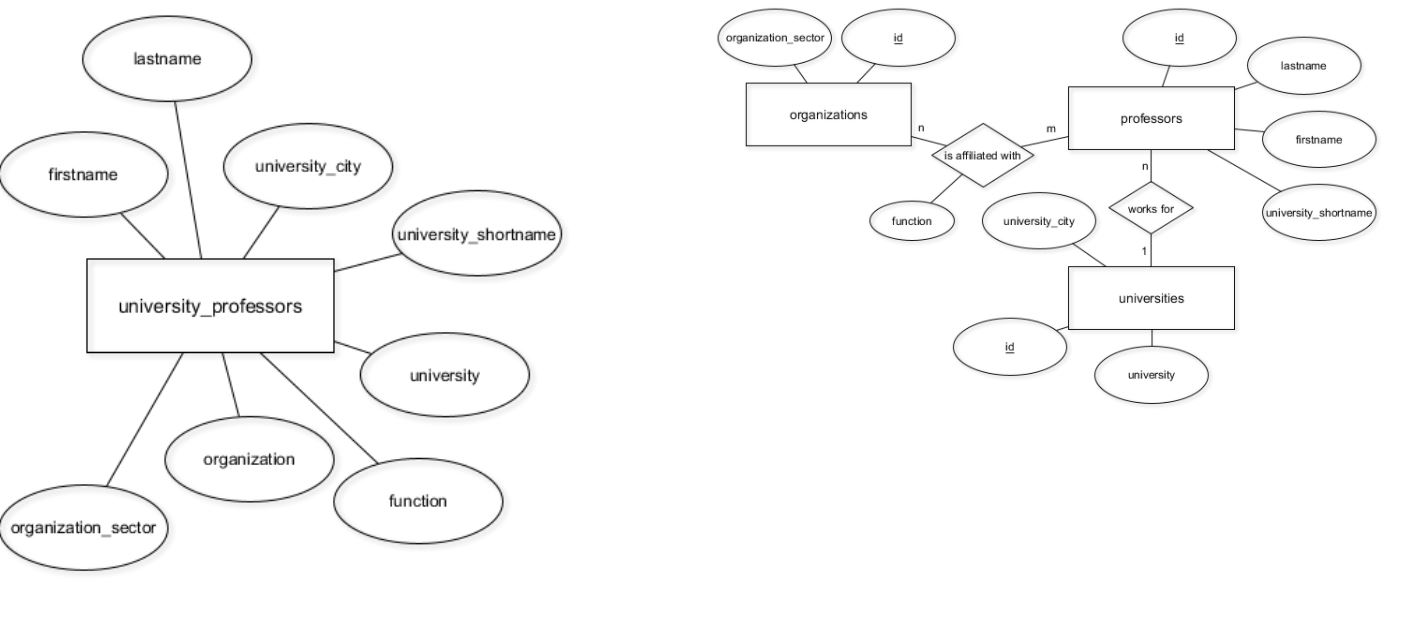

In [9]:
## The right is the model of the databases : "professors", "universities" and "organizations"
## The left : "university_professors" is result of the model databases from the right

To do this, noting that:

> column data types
>
> primary keys
>
> Specify the relationship between tables

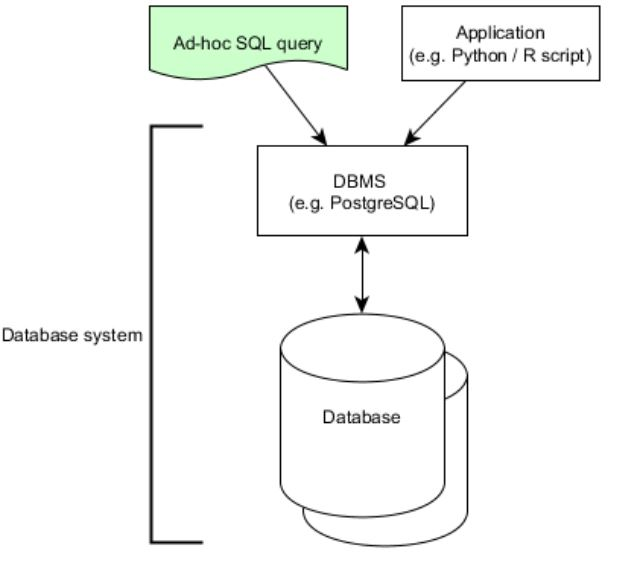

In [7]:
## The database ecosystem!

### EXERCISEs

#### Exercisce 4.1. Count affiliations per university
Now that your data is ready for analysis, let's run some exemplary `SQL queries` on the database. You'll now use already known concepts such as grouping by columns and joining tables.

In this exercise, you will find out which university has the most `affiliations` (through its professors). For that, you need both `affiliations` and `professors` tables, as the latter also holds the `university_id`.

As a quick repetition, remember that joins have the following structure:

                    SELECT table_a.column1, table_a.column2, table_b.column1, ... 
                    FROM table_a
                    JOIN table_b 
                    ON table_a.column = table_b.column
This results in a combination of `table_a` and `table_b`, but only with rows where `table_a.column` is equal to `table_b.column`.

#### Instructions
Count the number of total `affiliations` by `university`. Then sort the result by that `count`, in `descending order` then print out the 5 highest values of `count`!

**SOLUTION**

                    SELECT COUNT(*), professors.university_id 
                    FROM affiliations
                    JOIN professors
                    ON affiliations.professor_id = professors.id
                    -- Group by the ids of professors
                    GROUP BY professors.university_id 
                    ORDER BY count DESC
                    
**query result**

count|university_id
-----|-------------
579|EPF
273|USG
162|UBE
133|ETH
75|UBA
40|UFR
36|UNE
35|ULA
33|UGE
7|UZH
4|USI

#### Exercise 4.2. Join all the tables together
In this last exercise, you will find the university city of the professor with the most `affiliations` in the sector `"Media & communication"`.

For this, you need to join all the tables, group by a column, and then use selection criteria to get only the rows in the correct sector.

#### Instructions 
**Step 1.** Join all tables in the database (starting with `affiliations, professors, organizations`, and `universities`) and look at the result.

**SOLUTION.**

                -- Join all tables
                SELECT *
                FROM affiliations
                JOIN professors
                ON affiliations.professor_id = professors.id
                JOIN organizations
                ON affiliations.organization_id = organizations.id
                JOIN universities
                ON professors.university_id = universities.id
                LIMIT 5
**query result.**

function|organization_id|professor_id|id|firstname|lastname|university_id|id|organization_sector|id|university|university_city|
--------|---------------|------------|--|---------|--------|-------------|--|-------------------|--|----------|---------------|
NA|CIHA|442|442|Peter|Schneemann|UBE|CIHA|Not classifiable|UBE|Uni Bern|Bern
Panel Member |SNF Ambizione Program|1|1|Karl|Aberer|EPF|SNF Ambizione Program|Education & research|EPF|ETH Lausanne|Lausanne
Member of Conseil Fondation IDIAP|Fondation IDIAP|1|1|Karl|Aberer|EPF|Fondation IDIAP|Education & research|EPF|ETH Lausanne|Lausanne
Member Conseil of Zeno-Karl Schindler Foundation|Zeno-Karl Schindler Foundation|1|1|Karl|Aberer|EPF|Zeno-Karl Schindler Foundation|Education & research|EPF|ETH Lausanne|Lausanne
Chairman of L3S Advisory Board|L3S Advisory Board|1|1|Karl|Aberer|EPF|L3S Advisory Board|Education & research|EPF|ETH Lausanne|Lausanne


**Step 2.**
Now group the result by `organization sector`, `professor`, and `university city`.

Count the resulting number of rows.

Then only retain rows with `"Media & communication"` as `organization sector`, and sort the table by count, in descending order.

**SOLUTION.**

                SELECT COUNT(*), organizations.organization_sector, 
                                 professors.id, universities.university_city
                FROM affiliations
                    JOIN professors
                        ON affiliations.professor_id = professors.id
                    JOIN organizations
                        ON affiliations.organization_id = organizations.id
                    JOIN universities
                        ON professors.university_id = universities.id
                WHERE organizations.organization_sector = 'Media & communication'
                GROUP BY organizations.organization_sector, professors.id, universities.university_city
                ORDER BY count DESC;

**query result.**

count|organization_sector|id|university_city|
-----|-------------------|--|---------------|
4|Media & communication|538|Lausanne
3|Media & communication|365|Saint Gallen
3|Media & communication|36|Lausanne
2|Media & communication|329|Zurich
2|Media & communication|523|Saint Gallen
2|Media & communication|425|Lausanne
2|Media & communication|505|Lausanne
2|Media & communication|42|Saint Gallen
2|Media & communication|361|Saint Gallen
1|Media & communication|261|Lausanne
1|Media & communication|293|Saint Gallen
1|Media & communication|297|Basel
1|Media & communication|323|Zurich
1|Media & communication|337|Lausanne
1|Media & communication|30|Lausanne
1|Media & communication|368|Lausanne
1|Media & communication|377|Lausanne
1|Media & communication|379|Lausanne
1|Media & communication|389|Lausanne
1|Media & communication|403|Lausanne
1|Media & communication|462|Lausanne
1|Media & communication|473|Lausanne
1|Media & communication|496|Saint Gallen
1|Media & communication|499|Lausanne
1|Media & communication|533|Zurich
1|Media & communication|537|Lausanne
1|Media & communication|343|Lausanne
1|Media & communication|62|Lausanne
1|Media & communication|88|Lausanne
1|Media & communication|101|Lausanne
1|Media & communication|173|Lausanne
1|Media & communication|205|Basel
1|Media & communication|213|Lausanne
1|Media & communication|220|Lausanne
1|Media & communication|258|Lausanne        

Good job! The professor with id 538 has the most `affiliations` in the `"Media & communication"` sector, and he or she lives in the city of `Lausanne`. Thanks to your database design, you can be sure that the data you've just queried is consistent. 

Of course, you could also put `university_city` and `organization_sector` in their own tables, making the data model even more formal. However, in database design, you have to strike a balance between modeling overhead, desired data consistency, and usability for queries like the one you've just wrote.